<a href="https://colab.research.google.com/github/kimbyeolhee/Regrssion-study/blob/main/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80_%ED%9A%8C%EA%B7%80%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [2]:
from sklearn.preprocessing import StandardScaler #평균0,분산1인 데이터 분포로 변환
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [3]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 학습, 예측
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

print('accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test, lr_preds)))

accuracy: 0.977
roc_auc: 0.972


In [6]:
from sklearn.model_selection import GridSearchCV

params = {'penalty':['l2','l1'],
          'C':[0.01,0.1,1,5,10]}
grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy',cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_,
                                                  grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도:0.975


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_se

# 회귀 트리

In [8]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

rf = RandomForestRegressor(random_state=0 , n_estimators=1000)
neg_mse_scores = cross_val_score(rf,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print("5 folds의 개별 Negative MSE scores:", np.round(neg_mse_scores,2))
print("5 folds의 개별 RMSE scores:", np.round(rmse_scores,2))
print("5 folds의 평균 RMSE scores:", np.round(avg_rmse,2))

5 folds의 개별 Negative MSE scores: [ -7.93 -13.06 -20.53 -46.31 -18.8 ]
5 folds의 개별 RMSE scores: [2.82 3.61 4.53 6.8  4.34]
5 folds의 평균 RMSE scores: 4.42


## 여러 회귀 트리 클래스를 사용하여 예측

In [11]:
def get_model_cv_prediction(model,X_data,y_target):
  neg_mse_scores = cross_val_score(model,X_data,y_target, scoring="neg_mean_squared_error",cv=5)
  rmse_scores = np.sqrt(-1 * neg_mse_scores)
  avg_rmse = np.mean(rmse_scores)
  print(model.__class__.__name__)
  print('5 교차 검증 평균 RMSE:',round(avg_rmse,3))

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]

for model in models:
  get_model_cv_prediction(model, X_data, y_target)

DecisionTreeRegressor
5 교차 검증 평균 RMSE: 5.978
RandomForestRegressor
5 교차 검증 평균 RMSE: 4.42
GradientBoostingRegressor
5 교차 검증 평균 RMSE: 4.269
[08:38:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:38:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:38:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:38:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:38:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor
5 교차 검증 평균 RMSE: 4.089
LGBMRegressor
5 교차 검증 평균 RMSE: 4.646


회귀 트리는 선형 회귀의 회귀 계수가 아닌 , featur 중요도로 상대적 중요도를 알 수 있다.

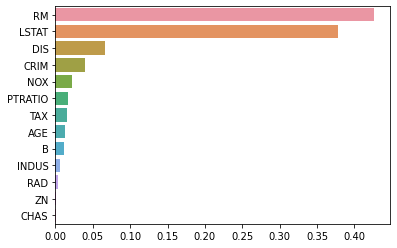

In [15]:
import seaborn as sns
%matplotlib inline

rf= RandomForestRegressor(n_estimators=1000)

rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False) #정렬
sns.barplot(x=feature_series, y=feature_series.index)


오버피팅을 시각화 하기 위해 한개의 feature 'RM'과 target값 PRICE 기반으로 회귀 예측 수행

(100, 2)


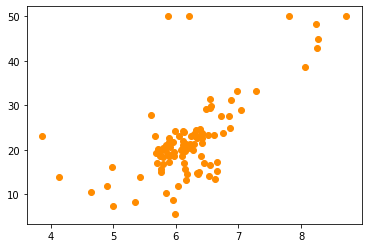

In [17]:
import matplotlib.pyplot as pyplot
%matplotlib inline

bostonDF_sample =bostonDF[['RM','PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100,random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')

In [18]:
import numpy as np

In [20]:
import numpy as np
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 예측을 적용할 test 데이터 셋 생성
X_test = np.arange(4.5,8.5,0.04).reshape(-1,1)

# 시각화 위해 feature은 RM, target은 PRICE
X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)

# 학습과 예측 수행
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

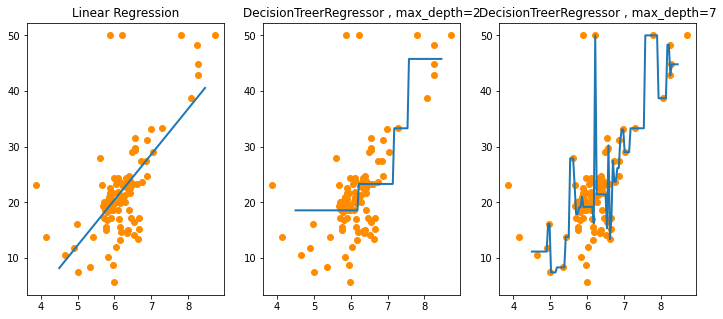

In [25]:
fig , (ax1,ax2,ax3) = plt.subplots(figsize=(12,5),ncols=3)

# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax1.plot(X_test, pred_lr, label="linear", linewidth=2)

# DecisionTreerRegressor , max_depth=2
ax2.set_title('DecisionTreerRegressor , max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax2.plot(X_test, pred_rf2, label="max_depth:3", linewidth=2)

# DecisionTreerRegressor , max_depth=7
ax3.set_title('DecisionTreerRegressor , max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax3.plot(X_test, pred_rf7, label="max_depth:7", linewidth=2)
